In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("UCMF_100.csv")

print(df.head())
print(df.describe())


   ID  Peso  Altura   IMC Atendimento        DN  IDADE Convenio   PULSOS  \
0   1   5.0      51  19.0    11/05/06  30/03/06   0.12       GS  Normais   
1   2   3.5      50  14.0    25/05/05  19/05/05   0.02       GS  Normais   
2   3   0.0       0   NaN    12/06/01  08/05/05  -4.05     SULA  Normais   
3   4   8.1      65  19.0    15/10/09  21/04/09   0.50      NaN  Normais   
4   5  39.5     142  20.0    23/01/09  24/10/99   9.60    Sulam  Normais   

   PA SISTOLICA  ...            PPA NORMAL X ANORMAL      B2      SOPRO  \
0           NaN  ...  Não Calculado          Anormal  Normal  Sistólico   
1           NaN  ...  Não Calculado          Anormal  Normal    ausente   
2           NaN  ...  Não Calculado          Anormal  Normal  Sistólico   
3           NaN  ...  Não Calculado          Anormal  Normal    ausente   
4          85.0  ...         Normal          Anormal  Normal    ausente   

      FC          HDA 1 HDA2 SEXO                      MOTIVO1  \
0  112.0     Palpitacao  N

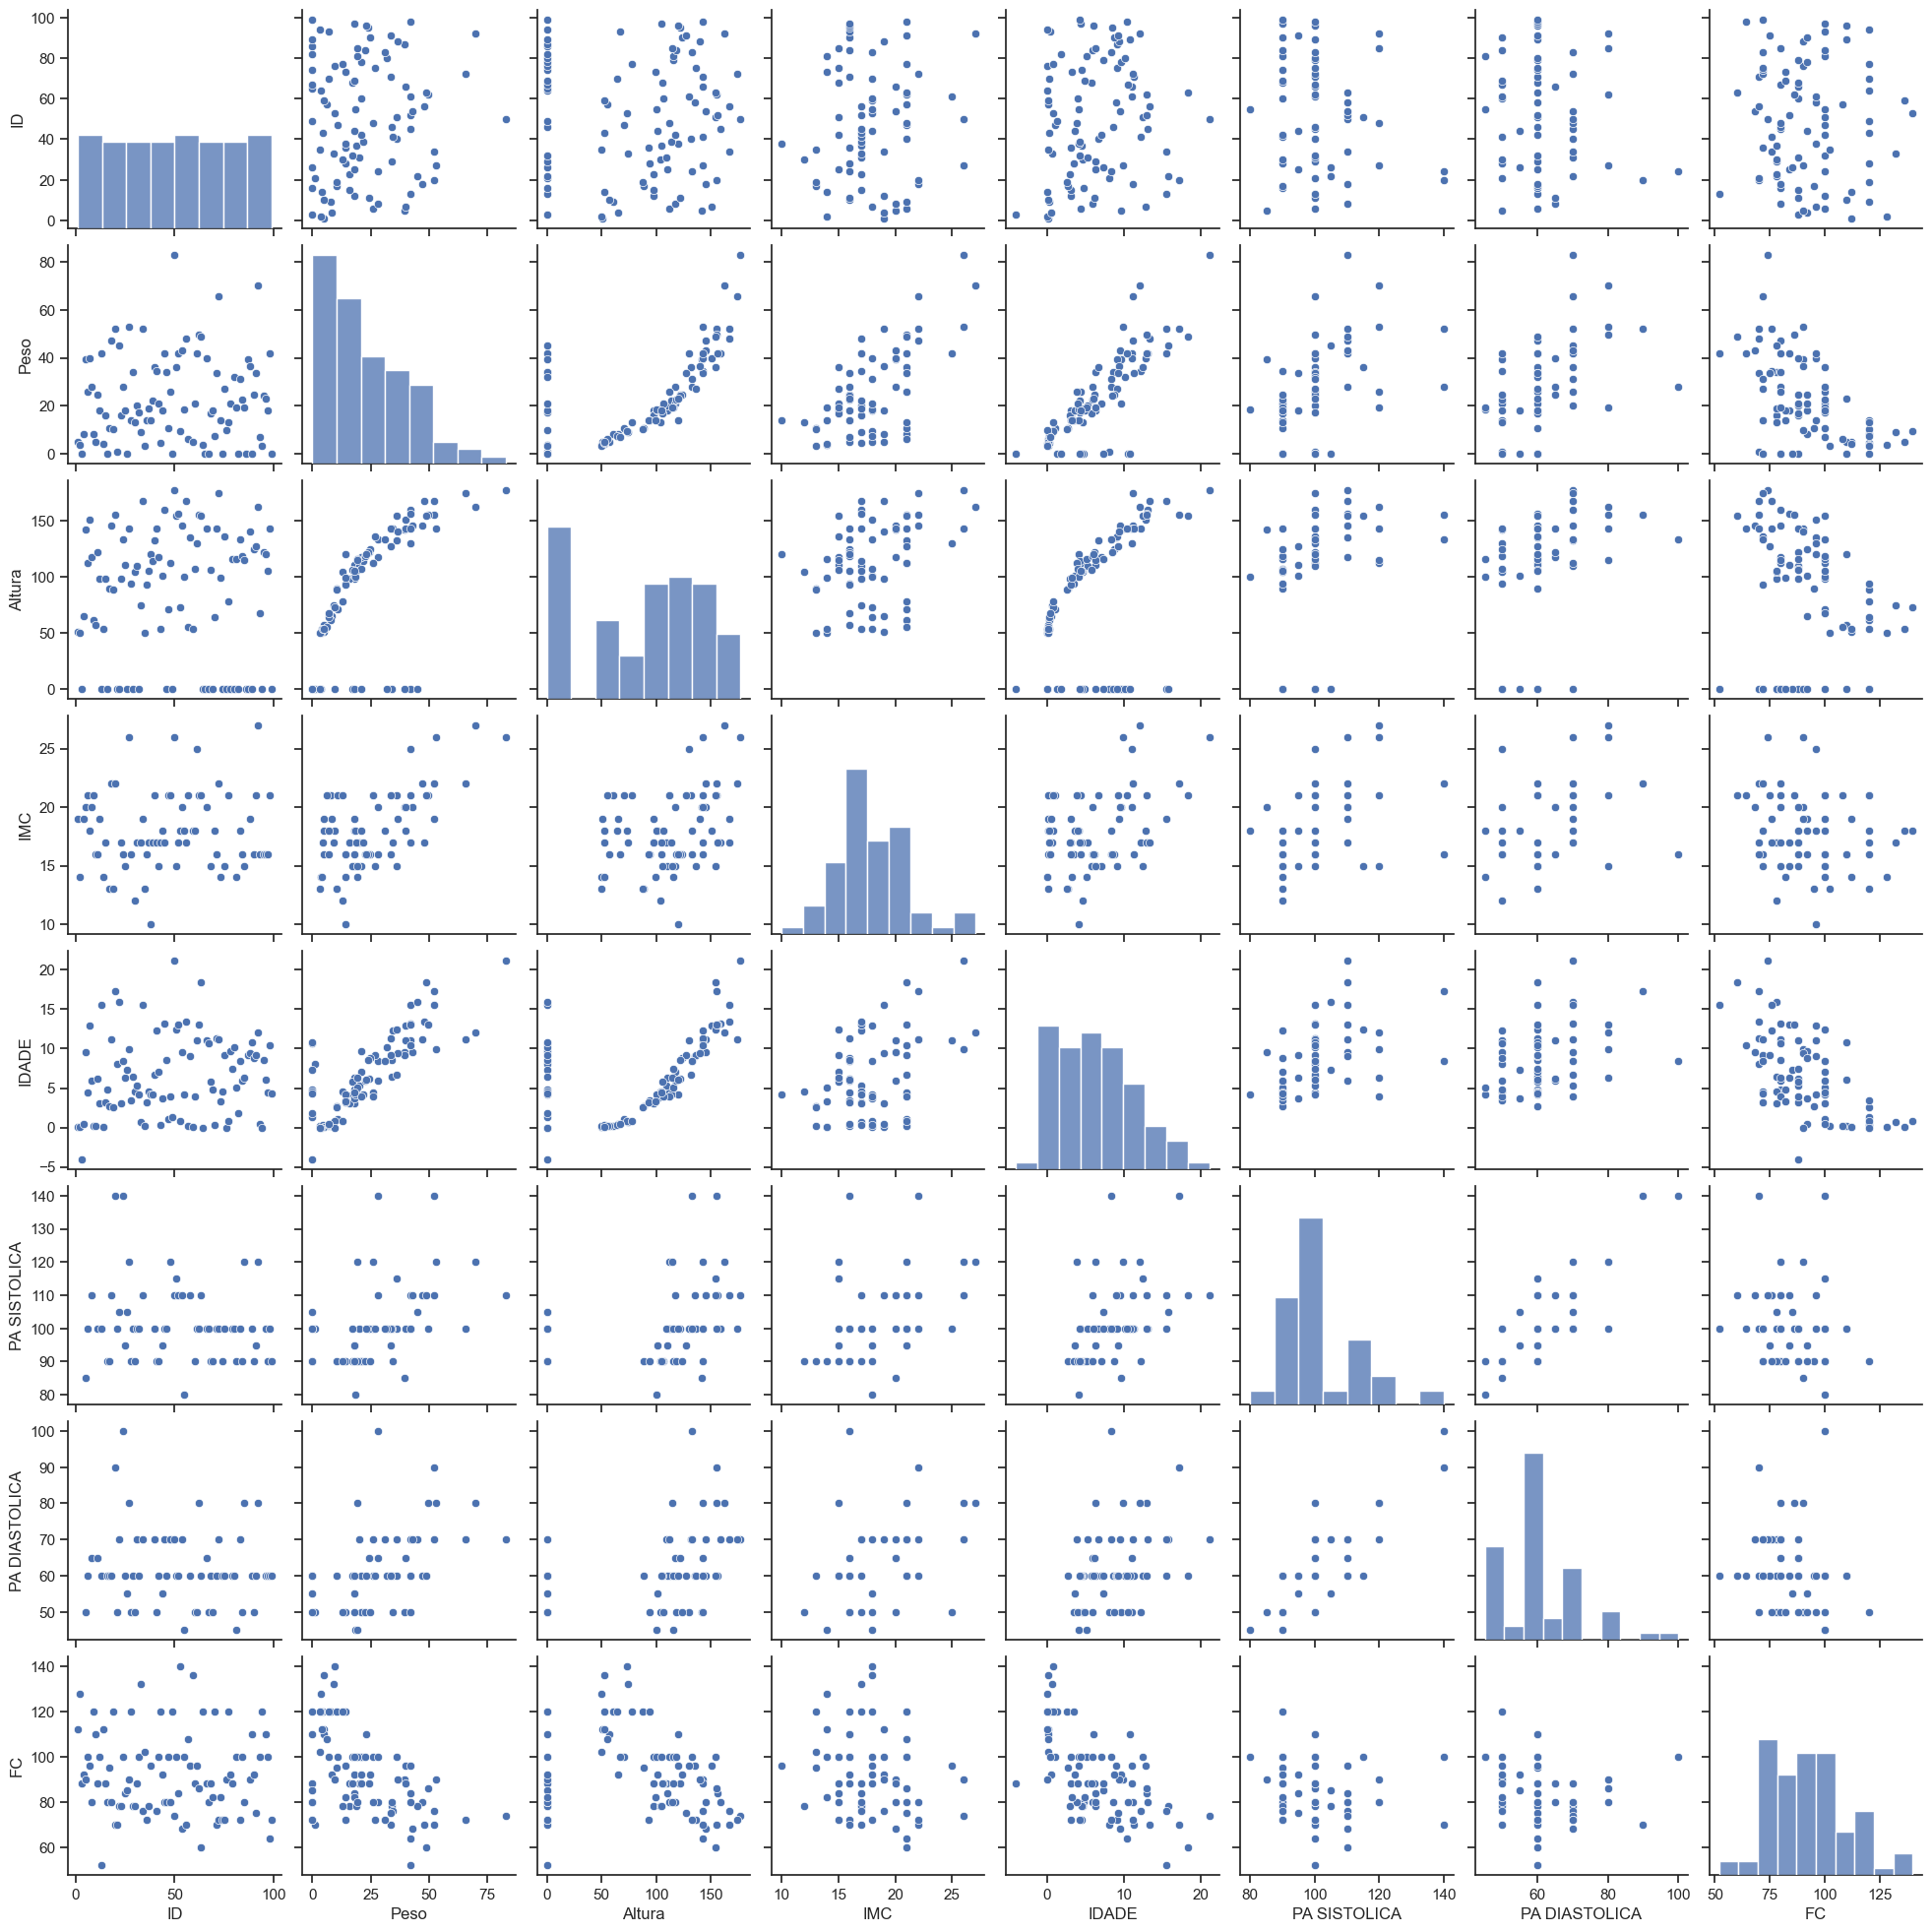

In [10]:
sns.pairplot(df)

plt.show()

# Problems with the data
1. Missing values
2. Outliers